Sex

In [1]:
import polars as pl
import matplotlib.pyplot as plt
file_path = r'C:\Users\ramya\Downloads\openpolicing.parquet'
lf = pl.scan_parquet(file_path)

In [3]:
# arrest made based on sex
clean = lf.select(['subject_sex', 'arrest_made']).drop_nulls().collect()
clean

subject_sex,arrest_made
str,str
"""female""","""FALSE"""
"""female""","""FALSE"""
"""male""","""FALSE"""
"""male""","""FALSE"""
"""male""","""FALSE"""
…,…
"""male""","""FALSE"""
"""male""","""FALSE"""
"""male""","""FALSE"""


([<matplotlib.patches.Wedge at 0x28a52c5dd90>,
 [Text(0.8142076292223549, 0.7396390582683641, 'Female'),
  Text(-0.8142076968188188, -0.7396389838569859, 'Male')])

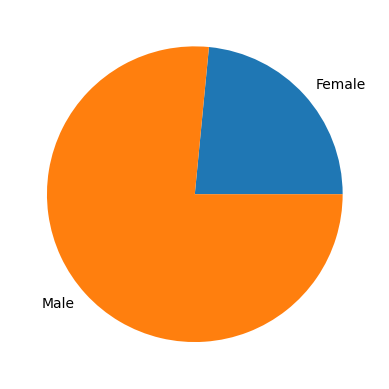

In [9]:
female_arrests_pos = clean.filter((pl.col('subject_sex') == 'female') & (pl.col('arrest_made') == 'TRUE')).shape[0]
male_arrests_pos = clean.filter((pl.col('subject_sex') == 'male') & (pl.col('arrest_made') == 'TRUE')).shape[0]

plt.pie([female_arrests, male_arrests], labels=['Female', 'Male'])

([<matplotlib.patches.Wedge at 0x28a52c9e490>,
 [Text(1.0996927234719844, 0.02599834500059104, 'Female Positive'),
  Text(1.0915086149873583, 0.13641460115537132, 'Male Positive'),
  Text(0.3714147982594387, 1.0353989799270138, 'Female Negative'),
  Text(-0.47361839579599396, -0.9928170099084873, 'Male Negative')])

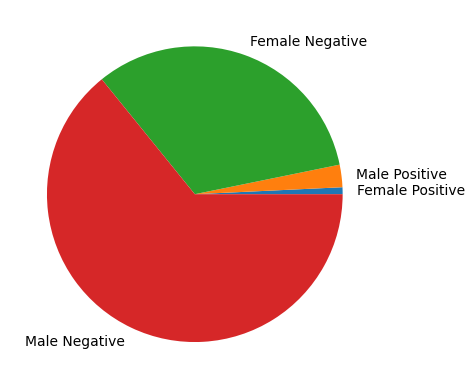

In [10]:
female_arrests_neg = clean.filter((pl.col('subject_sex') == 'female') & (pl.col('arrest_made') == 'FALSE')).shape[0]
male_arrests_neg = clean.filter((pl.col('subject_sex') == 'male') & (pl.col('arrest_made') == 'FALSE')).shape[0]

plt.pie([female_arrests_pos, male_arrests_pos, female_arrests_neg, male_arrests_neg],
        labels=['Female Positive', 'Male Positive', 'Female Negative', 'Male Negative'])